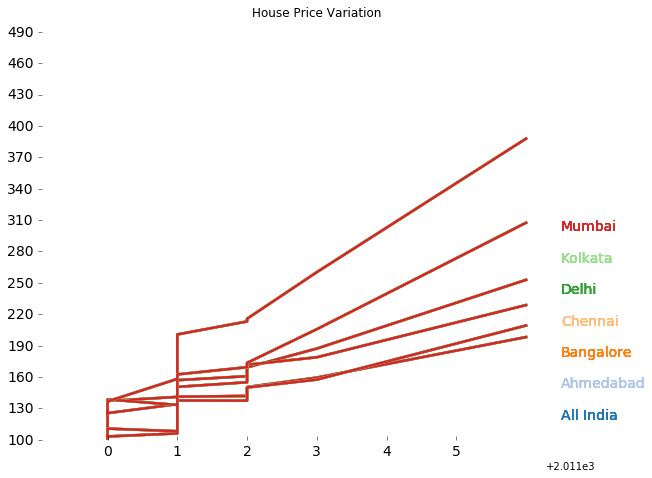

In [6]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
from sklearn import datasets, linear_model
import matplotlib.cm as cm
%matplotlib inline

def get_data(file_name):
	data= pd.read_csv(file_name)
	X_parameter_year= []
	y_parameter_allIndia =[]
	y_parameter_Ahmedabad=[]
	y_parameter_Bangalore=[]
	y_parameter_Chennai=[]
	y_parameter_Delhi=[]
	y_parameter_Kolkata=[]
	y_parameter_Mumbai=[]
	#data['Chennai'],data['Delhi'],data['Kolkata'],data['Mumbai']
	for year,priceAI,priceA,priceB,priceC,priceD,priceK,priceM, in zip(data['Years'], data['All India'],data['Ahmedabad'],data['Bangalore'],
		data['Chennai'],data['Delhi'],data['Kolkata'],data['Mumbai']):

		X_parameter_year.append([float(year)])
		y_parameter_allIndia.append([float(priceAI)])
		y_parameter_Ahmedabad.append([float(priceA)])
		y_parameter_Bangalore.append([float(priceB)])
		y_parameter_Chennai.append([float(priceC)])
		y_parameter_Delhi.append([float(priceD)])
		y_parameter_Kolkata.append([float(priceK)])
		y_parameter_Mumbai.append([float(priceM)])

	return X_parameter_year, y_parameter_allIndia, y_parameter_Ahmedabad,y_parameter_Bangalore,y_parameter_Chennai, y_parameter_Delhi,y_parameter_Kolkata,y_parameter_Mumbai
def linearmodel(X,y,predict_value):
	regr= linear_model.LinearRegression()
	regr.fit(X,y)
	predict_outcome= regr.predict(predict_value)
	predication={}
	predication['intercept']=regr.intercept_
	predication['coefficient']= regr.coef_
	predication['predicted_value']= predict_outcome
	return predication

X,yAI,yA,yB,yC,yD,yK,yM=get_data("D:\Devotion of time\Data/input_data.csv")
predict_value=[2014,2015,2016,2017]
#result= linearmodel(X,y1,predict_value)
for pv in predict_value:
	for y in (yAI,yA,yB,yC,yD,yK,yM):
		result= linearmodel(X,y,pv)
		y.append([float(result['predicted_value'])])
	X.append([float(pv)])
		
	



def graph_fig(X,y1,y2,y3,y4,y5,y6):
	color_sequence=['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c','#98df8a', '#d62728']
	fig, ax = plt.subplots(1,1, figsize=(10,7.5))

	ax.spines['top'].set_visible(False)
	ax.spines['bottom'].set_visible(False)
	ax.spines['right'].set_visible(False)
	ax.spines['left'].set_visible(False)


	ax.get_xaxis().tick_bottom()
	ax.get_yaxis().tick_left()

	plt.xlim(2010,2018)
	plt.ylim(100,500)

	plt.xticks(range(2011,2017,1), fontsize=14)
	plt.yticks(range(100,500,30), fontsize=14)
	cities= ["All India","Ahmedabad","Bangalore","Chennai","Delhi","Kolkata","Mumbai"]
	for y in (y1,y2,y3,y4,y5,y6):
		for i in range(len(cities)):
			line = plt.plot(X,y,lw=2.5,color=color_sequence[i])
			plt.text(2017.5,120+30*i,cities[i], fontsize=14, color=color_sequence[i])
		

	plt.title('House Price Variation')
	plt.show()
graph_fig(X,yAI,yA,yB,yC,yD,yK)

